In [1]:
import scipy
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.patches as mpatches
import sys
import os
import time

# Import Refexp python class
# Please MAKE SURE that ./google_refexp_py_lib is in your
# python library search path
sys.path.append("google_refexp_py_lib")
from refexp import Refexp

In [9]:
# Specify datasets path.
refexp_filename='google_refexp_dataset_release/google_refexp_train_201511_coco_aligned.json'
coco_filename='external/coco/annotations/instances_train2014.json'
imagesDir = 'external/coco/images'
imagesType = 'train2014'

# Create Refexp instance.
refexp = Refexp(refexp_filename, coco_filename)

loading annotations into memory...
Done (t=31.21s)
creating index...
index created!
Dataset loaded.


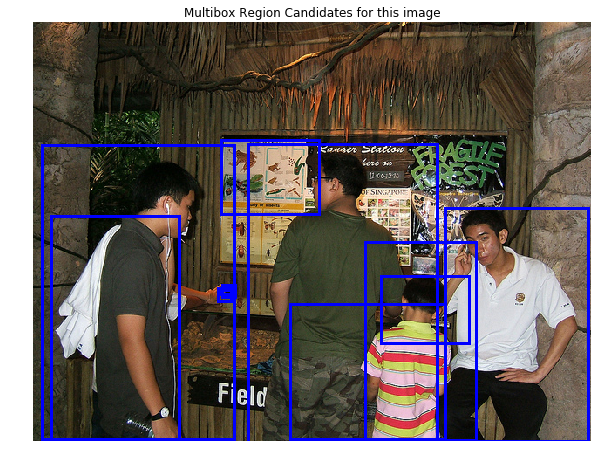

In [10]:
# Get all images that contain all given categories.
catIds = refexp.getCatIds(catNms=['person'])
imgIds = refexp.getImgIds(catIds=catIds)
# Select random image.
random_img_id = imgIds[np.random.randint(0,len(imgIds))]
img = refexp.loadImgs(random_img_id)[0]
# Plot image and all region candidates from multibox detector.
I = io.imread(os.path.join(imagesDir, imagesType, img['file_name']))
plt.figure()
plt.imshow(I)
ax = plt.axis('off')
plt.title('Multibox Region Candidates for this image')
refexp.showRegionCandidates(img)

Referring expressions for the object in the bounding box: 
A man is wearing green camp pants and green shirt and is right in front of desk.
a man wearing the green t shirt


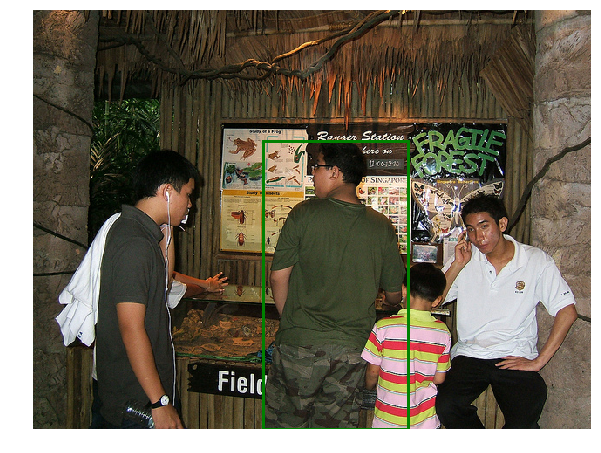

In [11]:
# Plot one annotation for the current image: bbox and referring expressions.
plt.imshow(I)
ax = plt.axis('off')
anns = refexp.getAnnIds(random_img_id)
ann = refexp.loadAnns(anns[0])[0]
refexp.showAnn(ann)

In [14]:
ann

{u'annotation_id': 184932,
 u'area': 35012.169299999994,
 u'bbox': [263.34, 149.48, 166.35, 330.52],
 u'category_id': 1,
 u'image_id': 389345,
 u'iscrowd': 0,
 u'refexp_ids': [101297, 101298],
 u'segmentation': [[282.2,
   351.87,
   268.89,
   305.29,
   283.3,
   254.28,
   296.06,
   229.88,
   303.82,
   221.56,
   324.34,
   215.47,
   322.67,
   211.03,
   321.56,
   200.49,
   320.46,
   178.87,
   328.77,
   160.02,
   334.87,
   151.7,
   365.92,
   149.48,
   380.34,
   170.55,
   379.23,
   194.39,
   369.81,
   208.81,
   377.01,
   221.01,
   400.3,
   232.65,
   411.95,
   244.3,
   419.71,
   274.24,
   429.69,
   300.86,
   420.82,
   320.26,
   424.14,
   336.34,
   410.28,
   339.67,
   401.97,
   334.68,
   400.3,
   320.82,
   393.65,
   337.45,
   394.2,
   358.52,
   378.12,
   390.13,
   373.69,
   400.11,
   385.33,
   403.44,
   381.45,
   416.74,
   381.45,
   428.94,
   377.01,
   440.59,
   374.8,
   477.74,
   373.13,
   480.0,
   263.34,
   478.85,
   266.

In [13]:
img

{u'coco_url': u'http://mscoco.org/images/389345',
 u'date_captured': u'2013-11-24 08:07:49',
 u'file_name': u'COCO_train2014_000000389345.jpg',
 u'flickr_url': u'http://farm9.staticflickr.com/8161/7449033064_31f3ea7f37_z.jpg',
 u'height': 480,
 u'image_id': 389345,
 u'license': 4,
 u'region_candidates': [{u'bounding_box': [380, 251, 127, 228],
   u'predicted_object_name': u'person'},
  {u'bounding_box': [246, 139, 217, 343], u'predicted_object_name': u'person'},
  {u'bounding_box': [10, 140, 220, 337], u'predicted_object_name': u'person'},
  {u'bounding_box': [472, 213, 164, 267], u'predicted_object_name': u'person'},
  {u'bounding_box': [398, 290, 101, 77], u'predicted_object_name': u'person'},
  {u'bounding_box': [212, 304, 15, 15],
   u'predicted_object_name': u'baseball glove'},
  {u'bounding_box': [294, 323, 178, 155], u'predicted_object_name': u'person'},
  {u'bounding_box': [216, 301, 15, 13],
   u'predicted_object_name': u'cell phone'},
  {u'bounding_box': [215, 135, 113, 84], 

An old man sitting down near plants.


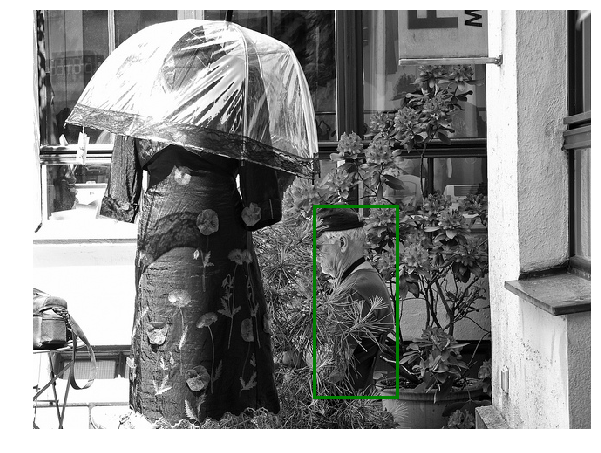

In [5]:
# Get all referring expressions with the given filters.
refexp_ids = refexp.getRefexpIds(tokens=['man'], len_min=4, len_max=7, referent='man', referent_has_attributes=True)
# Display a random one if any.
random_refexp_id = refexp_ids[np.random.randint(0,len(refexp_ids))]
random_refexp = refexp.loadRefexps(random_refexp_id)
print random_refexp[0]['raw']
# Show the associated image.
img_id_for_random_refexp = refexp.getImgIds(refexpIds = random_refexp_id)
img_for_random_refexp = refexp.loadImgs(img_id_for_random_refexp)[0]
I = io.imread('%s/%s/%s'%(imagesDir, imagesType, img_for_random_refexp['file_name']))
plt.figure()
plt.imshow(I)
ax = plt.axis('off')
# Plot the bbox.
ann_id_for_refexp = refexp.getAnnIds(refexpIds=random_refexp_id)[0]
ann_for_refexp = refexp.loadAnns(ann_id_for_refexp)[0]
refexp.showAnn(ann_for_refexp, printRefexps=False)

In [7]:
catIds = refexp.getCatIds()
# Get all images that contain all given categories.
i=0
for catId in catIds:
    imgIds = refexp.getImgIds(catIds=[catId])
    #print("Category: " + str(catId) + ", num images: " + str(len(imgIds)))
    # Select random image.
    ids = np.random.randint(0,len(imgIds),2) 
    #print(ids)
    random_img_ids = [imgIds[id_] for id_ in ids]
    for random_img_id in random_img_ids:
        img = refexp.loadImgs(random_img_id)[0]
        I = io.imread(os.path.join(imagesDir, imagesType, img['file_name']))
        plt.figure(i)
        plt.imshow(I)
        title = ""
        anns = refexp.getAnnIds(random_img_id)
        ann = refexp.loadAnns(anns[0])[0]
        for ref in ann['refexp_ids']:
            title += refexp.dataset['refexps'][ref]['raw'] + '\n'
            for triple in refexp.dataset['refexps'][ref]['clausie_triples']:
                title += "(" + triple['subject'] + ")\t(" + triple['predicate'] + ")\t(" + triple['object'] + ")\n" 
        plt.title(title)
        i += 1
        #anns = refexp.getAnnIds(random_img_id)
        #ann = refexp.loadAnns(anns[0])[0]
        #refexp.showRegionCandidates(img)
        refexp.showAnn(ann, printRefexps=False)
        #time.sleep(2)
        

ValueError: low >= high

In [6]:
img

NameError: name 'img' is not defined

In [12]:
ann

{u'annotation_id': 142955,
 u'area': 23381.29039999999,
 u'bbox': [0.36, 34.03, 189.78, 181.51],
 u'category_id': 3,
 u'image_id': 77806,
 u'iscrowd': 0,
 u'refexp_ids': [47259, 47260],
 u'segmentation': [[8.62,
   34.03,
   36.67,
   34.85,
   136.51,
   37.33,
   171.16,
   60.43,
   190.14,
   83.53,
   190.14,
   94.26,
   176.94,
   97.56,
   168.68,
   104.98,
   144.76,
   109.11,
   131.55,
   109.94,
   110.1,
   140.46,
   105.98,
   166.04,
   105.98,
   180.07,
   99.38,
   190.8,
   91.12,
   191.62,
   82.05,
   212.25,
   77.1,
   215.54,
   0.36,
   209.78,
   2.01,
   34.85]]}

In [25]:
# Specify datasets path.
refexp_filename='google_refexp_dataset_release/google_refexp_val_201511_coco_aligned.json'
#refexp_filename='google_refexp_dataset_release/google_refexp_train_201511_coco_aligned.json'
coco_filename='external/coco/annotations/instances_train2014.json'
imagesDir = 'external/coco/images'
imagesType = 'train2014'

# Create Refexp instance.
refexp = Refexp(refexp_filename, coco_filename)

loading annotations into memory...
Done (t=48.97s)
creating index...
index created!
Dataset loaded.


In [33]:
# Get all referring expressions with the given filters.
refexp_ids = refexp.getRefexpIds()
refs_to_save = {"images": {}, "annotations": {}, "refexps": {}}
saved_images = {}
saved_anns = {}
for i in refexp_ids:
    ref = refexp.loadRefexps(i)
    img_id = refexp.getImgIds(refexpIds = [i])
    img = refexp.loadImgs(img_id)[0]
    ann_id = refexp.refexpToAnnId[i]
    ann = refexp.loadAnns(ann_id)[0]
    target_cat = ann['category_id']
    img_ann_ids = refexp.getAnnIds(imgIds=img_id)
    img_anns = refexp.loadAnns(img_ann_ids)
    
    for a in img_anns:
        if target_cat == 1 and a['category_id'] == target_cat and a['annotation_id'] != ann['annotation_id']:
            refs_to_save['refexps'][i]  = ref[0]
            refs_to_save['images'][img_id[0]]  = img
            refs_to_save['annotations'][ann_id] = ann
            break
    # refexp.showAnn(ann_for_refexp, printRefexps=False)

In [36]:
len(refs_to_save['images'])

108

In [37]:
import json

with open('google_refexp_dataset_release/multiobject_instances_people_val.json', 'w') as f:
    json.dump(refs_to_save, f)